# Machine learning - les 4 - unsupervised learning

Notebook bij les 4 van de leerlijn machine learning van S3 - AI. 

© Auteur: Rianne van Os

**Voorbereiding voor deze les:**
- Bekijk onderstaande theorie en maak t/m Opdracht 4.1.
- Bekijk dit youtube filmpjes: https://youtu.be/R2e3Ls9H_fc


In de vorige 3 machine learning lessen ben je aan de slag gegaan met *supervised learning*. Dit is de term voor het maken van modellen waarbij je een *target* variabele gaat voorspellen. Belangrijk daarbij is dan ook dat je historische data hebt waarbij die target al bekend is.

Maar ook als er geen targetvariabele is, zijn er machine learning technieken die je in kunt zetten om informatie uit je data te halen. We spreken dan van *unsupervised learning*. Er zijn geen labels bekend, we gaan dus niks 'voorspellen', maar we gaan zoeken naar patronen in de data die ons informatie geven. 

Hieronder enkele toepassingen:
- **Klantsegmentatie** Een streamingsdienst heeft miljoenen kijkers, maar deze klanten hebben geen specifieke labels zoals 'actiefilmfan' of 'comedyliefhebber'. Met clustering kun je deze kijkers toch groeperen. Je traint een algoritme dat  kijkgedrag analyseert (welke films kijken ze, hoe lang, etc.) en clusters vormt van mensen met vergelijkbare voorkeuren. Als iemand in een cluster een bepaalde film leuk vindt, kan die film aan vergelijkbare klanten in dezelfde groep worden aanbevolen. 
- **Opsporen van outliers** Clustering kan ook helpen bij het vinden van **outliers**. Datapunten die niet in een logisch cluster passen zijn mogelijke outliers, hiermee kun je je dataset opschonen en je supervised modellen verbeteren. (Denk aan de outliers die we gezien hebben in een scatterplot met lengte en gewicht van personen.)
- **Associatieregels** Een supermarkt kan clustering gebruiken om te bepalen welke producten klanten vaak samen kopen. Het algoritme analyseert duizenden aankooptransacties en groepeert producten die vaak in dezelfde winkelwagen belanden. Hierdoor ontstaan patronen zoals 'mensen die luiers kopen, kopen ook vaak bier'. Met deze kennis kan de supermarkt productplaatsing optimaliseren of gerichte aanbiedingen doen.
- **Anomaly detection** Bij fraudebestrijding of het detecteren van cyberaanvallen weet je niet altijd hoe 'fraude' of 'aanval' er precies uitziet (je hebt geen gelabelde voorbeelden van alle mogelijke fraudegevallen). *Anomaly detection* is een vorm van unsupervised learning waarbij het algoritme leert wat normaal gedrag is en alle data die niet binnen een normaal patroon vallen kunnen aangemerkt worden als anomalie (dus als fraude of als aanval). Overigens kunnen er ook supervised learning technieken gebruikt worden voor anomaliedetectie.
- **Dimensionality reduction** Soms werk je met datasets die zoveel variabelen (features) hebben dat ze onhandelbaar worden – honderden of zelfs duizenden. Dit maakt visualisatie onmogelijk en vertraagt supervised modellen. Dimensionaliteitsreductie is een unsupervised techniek die hierbij helpt. Technieken zoals Principal Component Analysis (PCA) vinden de belangrijkste onderliggende patronen in deze hoog-dimensionale data en projecteren de data op een lager aantal dimensies, zonder dat je vooraf 'belangrijke' variabelen hoeft te labelen.

In dit college gaan we aan de slag met clustering, met name komen de algoritmes K-means en DBSCAN aan bod. 


In [84]:
#Importeer benodigde libraries - voeg toe als je meer nodig hebt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

## k-means clustering

Bij clustering ga je op zoek naar logische groepen in je data. In 2 dimensies is dit makkelijk te visualiseren:
Bron: https://pranshu453.medium.com/k-means-clustering-simplified-in-python-ab57b8d629db

![clustering](../afbeeldingen/MachineLearning/kmeans.png "Finding clusters with k-means")


Je ziet hier dat datapunten die dichtbij elkaar liggen bij elkaar in een cluster worden gestopt. Als deze clusters een betekenis hebben, bijvoorbeeld: 'jonge klanten die van actiefilms houden'. Of 'vrouwelijke klanten die van thrillers houden', dan kun je die informatie gebruiken om bijvoorbeeld gerichte marketingcampagnes te maken.

Bij k-means clustering kies je zelf het aantal clusters dat je wilt maken (k) en het algoritme gaat dan op zoek naar de clusters. Het k-means algoritme is heel simpel:
1. Kies k willekeurige datapunten als middelpunt (*centroid*) van een cluster
2. Wijs ieder datapunt toe aan het cluster waarvan het middelpunt het dichtstbij is. 
3. Bepaal voor elk van de in stap 2 gevonden clusters het gemiddelde van de datapunten. Dit is het nieuwe middelpunt van het cluster.
4. Herhaal stap 2 en 3 totdat de centra niet meer veranderen of totdat een maximum aantal iteraties is bereikt.

We gaan dit illustreren op gegenereerde data.

In [85]:
def genereer_data(num_samples=500, num_clusters_true=5, random_seed=42):
    """Genereert synthetische data voor K-Means."""
    np.random.seed(random_seed)
    X = []
    # Genereer data rondom verschillende 'echte' centra
    centers = np.array([[-3, 3], [-3,2], [0,1], [0, -2], [4, 4]])
    for i in range(num_clusters_true):
        X.append(np.random.randn(num_samples // num_clusters_true, 2) * 0.8 + centers[i])
    X = np.vstack(X)
    return X

Text(0, 0.5, 'feature 2')

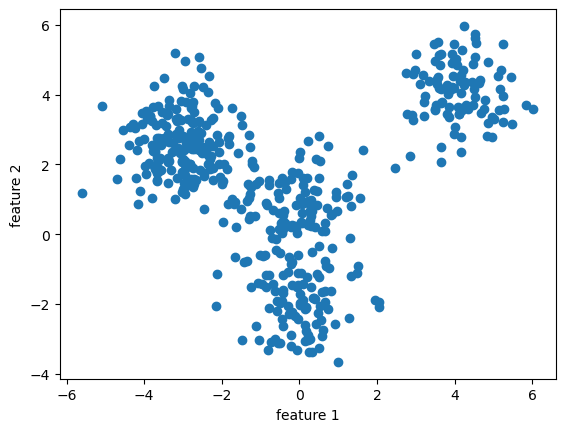

In [86]:
kmeans_data = genereer_data()
plt.scatter(x = kmeans_data[:,0], y = kmeans_data[:,1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In deze dataset zie je met het oog al dat er waarschijnlijk 4 (misschien 3?) logische clusters te maken zijn. Hierboven hadden we de stappen van k-means al beschreven en in het college zullen we hier nog even op ingaan. Hieronder gaan we kijken hoe we sklearn kunnen gebruiken om een k-means model te trainen.

Dit gaat als volgt:
1. Maak een kMeans model aan (zie https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
2. Definieer de dataset (we hoeven hier niet te splitsen in train en test, want we gaan geen voorspelling doen, we gaan alleen clusters maken)
3. Kies de hyperparameters, zoals het aantal clusters (k)
4. Train het model (door .fit aan te roepen)
5. Toon de resultaten (zoals de labels en de centroids)

Een voorbeeld op deze gegenereerde dataset:

In [87]:
# Stap 1: maak kMeans model aan
kmeans_model = KMeans()

In [88]:
# Stap 2: definieer dataset (in dit geval hebben we die al, namelijk kmeans_data)
X = kmeans_data

In [89]:
# Stap 3: Kies de hyperparameters (wij kiezen nu alleen het aantal clusters (4))
kmeans_model.set_params(n_clusters = 4)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [90]:
#Stap 4: train het model
kmeans_model.fit(X)

c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [91]:
#Stap 5: bekijk resultaten:
print(f"De gevonden cluster middelpunten {kmeans_model.cluster_centers_}")
print(f"De labels van de datapunten: {kmeans_model.labels_}")

De gevonden cluster middelpunten [[-3.05049505  2.58963654]
 [-0.1917654   0.83469076]
 [ 4.08525133  4.08186745]
 [-0.01198315 -2.00730499]]
De labels van de datapunten: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2

Deze kunnen we nu ook visualiseren:

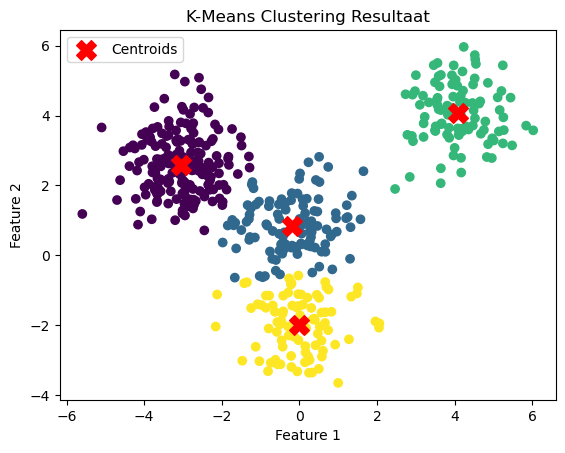

In [92]:
plt.scatter(x = kmeans_data[:,0], y = kmeans_data[:,1], c = kmeans_model.labels_, cmap='viridis')
plt.scatter(x = kmeans_model.cluster_centers_[:,0], y = kmeans_model.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title('K-Means Clustering Resultaat')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Stel nu dat dat we en nieuw datapunt hebben, bijvoorbeeld het punt $(-2, 1.5)$. Dan kunnen we het kMeans model gebruiken om te bepalen bij welk cluster deze hoort.

In [93]:
kmeans_model.predict([[-2, 1.5]])

array([0], dtype=int32)

Dit laat zien dat het bij cluster met het nummer 0 hoort (in het plaatje het donker paarse cluster).

### Visualisatie van k-means stappen
Om een goed beeld te krijgen van hoe de stappen van k-means eruit zien, is deze site een aanrader: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
Je kunt hier voor verschillende datasets en verschillende clusteraantallen zien hoe de clusters worden gevormd. Begin bij de datast Guassian Mixture en Packed circles. Je kunt het aantal clusters kiezen (door herhaaldelijk op add centroids) en dan door op 'Update Centroids' en 'Reassign Points' te klikken zie je de stappen van k-means.
Je ziet hier ook de zogenoemde Voronoi diagrammen onstaan, die de gebieden weergeven die bij een cluster horen.

### ML Opdracht 4.1
We bekijken een klein datasetje waarin voor 8 ijswinkels staat hoeveel chocolade- en hoeveel vanilleijs er verkocht is. Die data wordt in onderstaande cel ingeladen. Maak 2 clusters met behulp van sklearn en visualiseer de gevonden clusters. Kun je een logica vinden in de clusters? Is er bijvoorbeeld een cluster van winkels die veel chocola verkopen en een ander cluster van winkels die veel vanille verkopen? 

Bij welk cluster zou het een winkel met 10 verkochte chocoladeijsjes en 5 verkochte vanille-ijsjes horen?

In [94]:
ijswinkel_verkoop = pd.DataFrame({'Chocolade': [12,15,18,10,8,9,12,20],'Vanille': [6,16,17,8,7,6,8,18]})

Text(0, 0.5, 'Vanille')

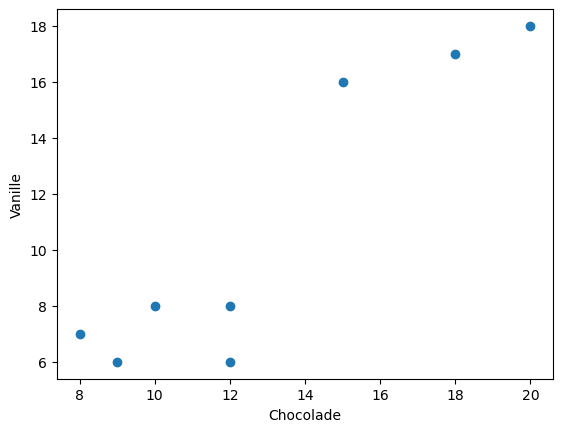

In [95]:
plt.scatter(x = ijswinkel_verkoop["Chocolade"], y = ijswinkel_verkoop["Vanille"])
plt.xlabel('Chocolade')
plt.ylabel('Vanille')

In [96]:
kmeans_model = KMeans()
kmeans_model.set_params(n_clusters = 2)
kmeans_model.fit(ijswinkel_verkoop)

c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


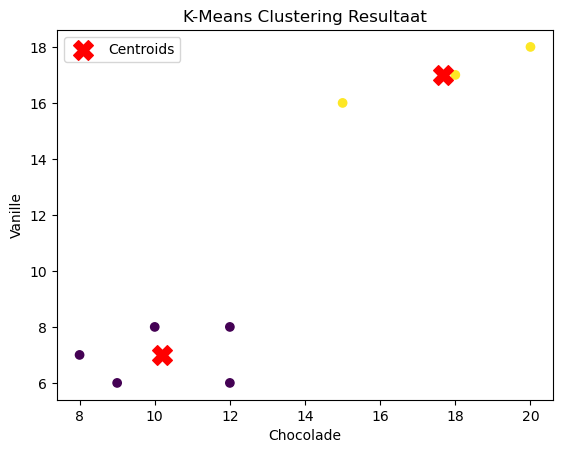

In [97]:
plt.scatter(x = ijswinkel_verkoop["Chocolade"], y = ijswinkel_verkoop["Vanille"], c = kmeans_model.labels_, cmap='viridis')
plt.scatter(x = kmeans_model.cluster_centers_[:,0], y = kmeans_model.cluster_centers_[:,1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title('K-Means Clustering Resultaat')
plt.xlabel('Chocolade')
plt.ylabel('Vanille')
plt.show()

In [98]:
print(f"De gevonden cluster middelpunten {kmeans_model.cluster_centers_}")
print(f"De labels van de datapunten: {kmeans_model.labels_}")
kmeans_model.predict(pd.DataFrame([[10, 5]], columns=["Chocolade", "Vanille"]))

De gevonden cluster middelpunten [[10.2         7.        ]
 [17.66666667 17.        ]]
De labels van de datapunten: [0 1 1 0 0 0 0 1]


array([0], dtype=int32)

### ML Opdracht 4.2
Nu gaan we een clustering uitvoeren op een echte dataset. We nemen hiervoor de iris dataset (zie iris_features.csv), dit is een bekende dataset met data over verschillende soorten irissen (de bloemen). De dataset bevat de volgende features:
- Sepal length (cm): de lengte van de kelkbladeren
- Sepal width (cm): de breedte van de kelkbladeren
- Petal length (cm): de lengte van de kroonbladeren
- Petal width (cm): de breedte van de kroonbladeren

De onderzoeker vermoed dat er verschillende soorten irissen zijn, aan jou de taak om logische clusters te vinden om deze soorten te onderscheiden.

a. Kies 2 features uit en visualiseer de data. Bedenk wat een logisch aantal clusters is en voer de clustering uit.

b. Voer nu een k-means clustering uit op de hele dataset (dus alle 4 de features). Visualiseer de gevonden clusters door naar verschillende combinaties van features te kijken. Hoeveel verschillende irissoorten zijn er volgens jou?

c. Stel we meten een nieuwe bloem op, en die heeft de volgende eigenschappen:
- Sepal length: 5.8

- Sepal width: 3.7

- Petal length: 1.2

- Petal width: 0.2

Bij welk cluster zou die horen?

## Het bepalen van k
De belangrijkste parameter bij k-means is natuurlijk $k$, het aantal clusters. Bij 2-dimensionale data kun je een scatterplot maken en op het oog het aantal clusters bepalen, maar je hebt net bij de Iris dataset al gezien dat dat veel lastiger wordt met meer dimensies. Om dan te bepalen welk aantal clusters het beste is, hebben we een maat nodig die de bepaald hoe goed de gevonden clusters zijn. 
Hiervoor gebruiken we de Within-Cluster Sum of Squares (WCSS), ook wel inertia genoemd. Hierbij bereken je voor ieder punt de afstand tot het dichtsbijzijnde clustercentrum, die afstanden worden gekwadrateerd en die tel je bij elkaar op. De formule hiervoor is:

$$ WCSS = \sum_{i=1}^{k} \sum_{x_j \in C_i} d(x_j,\mu_i)^2 $$
waarbij $C_i$ het cluster is, $x_j$ een datapunt in dat cluster en $\mu_i$ het clustercentrum van dat cluster en $d(x_j, \mu_i)$ is de afstand tussen het datapunt en het clustercentrum.
Je hoeft dit niet zelf te kunnen uitrekenen, deze is beschikbaar in sklearn als de `inertia_` property van het kMeans model.

Op iedere dataset zou je een intertia van 0 kunnen bereiken, namelijk door elk datapunt in een eigen cluster te stoppen. Maar dat heeft natuurlijk weinig zin. Het doel is dus niet om een zo klein mogelijke inertia te krijgen, maar om een goede balans te vinden tussen het aantal clusters en de intertia.

Hiervoor kunnen we de *Elbow method* gebruiken. Daarbij plot je voor verschillende waarden van $k$ de inertia. Je zoekt dan naar een waarde van $k$ waarbij de inertia niet meer significant daalt, dit is het punt waar de 'elleboog' zit in de grafiek. Dit is het aantal clusters dat je zou kunnen kiezen. Het beste aantal clusters is altijd afhankelijk van wat je vervolgens met die geclusterde data wilt gaan doen, maar de elbow method geeft je een idee van wat een logisch aantal clusters zou kunnen zijn.

Hieronder de code en visualisatie van hoe dat eruit zou zien: 

c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMe

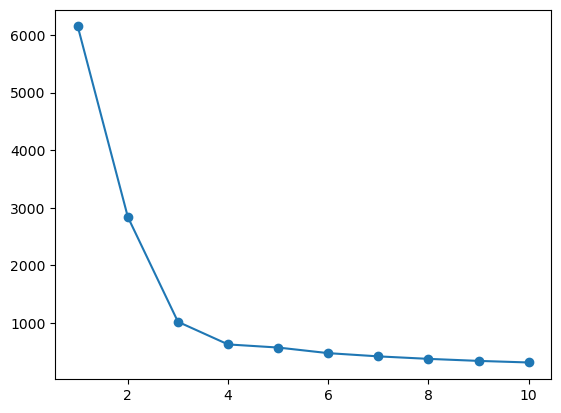

In [99]:
#genereer data voor K-Means
kmeans_data = genereer_data()

max_k = 10
inertia_values = []

#train model voor verschillende waarden van k en bereken inertia
for k in range(1, max_k + 1):
    model_kmeans = KMeans(n_clusters=k, random_state=42)
    model_kmeans.fit_predict(kmeans_data)
    inertia_values.append([k, model_kmeans.inertia_])
    
#plot de inertia waarden tov k
plt.plot([x[0] for x in inertia_values], [x[1] for x in inertia_values], marker='o')


Je ziet hier dat de inertia waarde af blijven nemen als het aantal clusters toeneemt, maar op een gegeven moment is de afname nog maar heel klein. We gaan hier dan op zoek naar de knik, oftwel *elbow* in de grafiek. Hier zie je dat een toenamen van $k$ van 3 naar 4 nog een behoorlijke afname veroorzaakt, maar daarna niet meer. Het optimale aantal clusters is hier dus 4.

### Opdracht 4.3
Bepaal met de elbow methode hoeveel verschillende irissoorten (dus hoeveel verschillende clusters) er aanwezig zijn in de iris dataset.

### Tekortkomingen van k-means
Door de manier waarop k-means werkt, worden er cirkelvormige clusters gevormd. Dit kan handig zijn als je data ook circelvormige clusters bevat, maar dat is zeker niet altijd het geval. 

### Opdracht 4.3
Ga weer naar https://www.naftaliharris.com/blog/visualizing-k-means-clustering/ en kies voor de dataset Smiley Face. Lukt het je om hier met k-means een goede clustering te maken?

Uiteraard is het niet realistisch dat je data de vorm heeft van een smiley, maar onderstaande vormen kun je wel tegenkomen:

Text(0, 0.5, 'Feature 2')

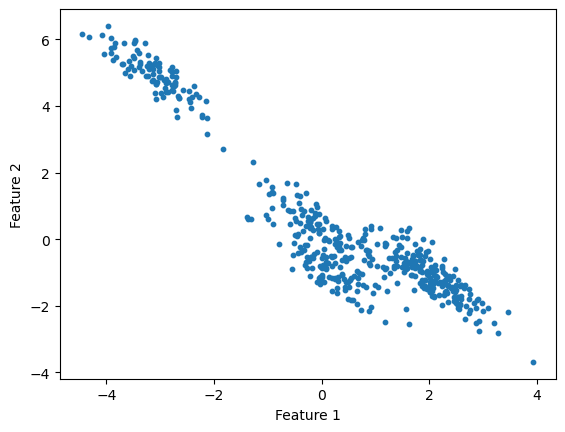

In [100]:
rng = np.random.RandomState(13)
X_stretched = np.dot(kmeans_data, rng.randn(2, 2))
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Je ziet hier ellipsvormige clusters, als we hier k-means op toepassen dan zullen de clusters niet goed gevonden worden, zoals onderstaande visualisatie laat zien.

c:\Users\mathi\anaconda3\envs\ai-s3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Feature 2')

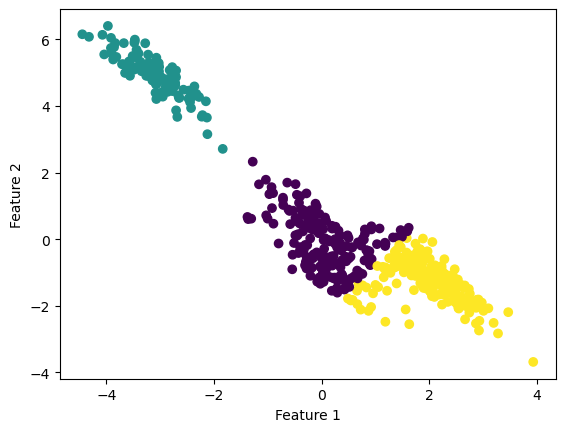

In [101]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Er zijn verschillende alternatieve clusteralgoritmes die hier beter werken. Een voorbeeld is Guassian Mixture Models (GMM), die is specifiek goed in het vinden van deze ellipsvormige clusters. Deze behandelen we niet in de les, maar je kunt hier meer informatie vinden: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

### DBSCAN
Een ander clusteralgoritme dat om kan gaan met clusters van verschillende vormen is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Dit algoritme werkt niet met een vooraf bepaald aantal clusters, maar zoekt clusters op basis van de dichtheid van de datapunten. Hierbij zijn twee parameters belangrijk:
- **Epsilon (eps)**: Dit is de maximale afstand tussen twee punten om ze nog als in hetzelfde cluster te beschouwen. 
- **MinPts**: Dit is het minimum aantal punten dat binnen de epsilon afstand van een punt moet liggen om het als een kernpunt te beschouwen.

Er wordt een random datapunt gekozen en er wordt gezocht naar alle punten die binnen de epsilon afstand van dat punt liggen. Zijn dit er meer dan MinPts, dan vormen deze punten een cluster. Vervolgens bekijk je voor alle punten binnen het cluster opnieuw of er punten binnen de epsilon afstand van dat punt liggen. Ook deze worden aan het cluster toegevoegd en zo breidt het cluster zich uit. Dit wordt herhaald er geen nieuwe punten meer gevonden worden binnen de epsilon afstand.

Daarna wordt een nieuw punt gekozen die nog niet bij een cluster hoort, en worden deze stappen herhaald. 

Ondertaande plaatje laat dit zien (Bron: https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/):

<img src="../afbeeldingen/MachineLearning/dbscan.png" alt="DBSCAN clustering" title="DBSCAN clustering" width="400">


Het CORE POINT is het eerst gekozen punt, en alle punten die in de cirkel met straal epsilon liggen worden vormen samen een cluster. Vanaf de BORDER POINTS ga je dan op zoek naar nieuwe punten die bij het cluster horen. 

Ook hier wordt dit proces weer goed gevisualiseerd: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ Kies hier eens voor de Smiley Face en je ziet dat DBSCAN hier wel een goede clustering kan maken.

Voor meer uitleg over DBSCAN zie: https://youtu.be/_A9Tq6mGtLI
Of lees: https://www.geeksforgeeks.org/machine-learning/dbscan-clustering-in-ml-density-based-clustering/


Uiteraard bevat sklearn ook een implementatie van DBSCAN, zie https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

### Opdracht 4.4
Bekijk de DBSCAN documentatie van sklearn en pas dit toe op de X_stretched data. Visualiseer de gevonden clusters.

### Andere clustering technieken
Naast DBSCAN en k-means zijn er nog veel meer technieken om data te clusteren. Dit plaatje geeft een mooie visuele weergave van verschillende technieken en de vormen clusters die ze kunnen vinden.
![cluster comparison](../afbeeldingen/MachineLearning/cluster_comparison.png 'Vergelijking van verschillende cluster technieken')

### ML Opdracht 4.5
Nu gaan we clustering toepassen op een interessantere dataset, namelijk de Credit Card Customer Segmentation dataset (`CC_GENERAL.cvs`). Deze dataset bevat informatie over klanten van een creditcardmaatschappij en hun transactiegedrag. We gaan deze data gebruiken om clusters te identificeren die ons inzicht geven in verschillende klantsegmenten.

De dataset komt van kaggle (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data) en hier vind je ook de beschrijving van de kolommen. Vooral de kolommen `BALANCE`, `PURCHASES`, `ONEOFF_PURCHASES`, en `PAYMENTS` zijn interessant voor clustering, omdat ze informatie geven over het transactiegedrag van de klanten. Kun je bijvoorbeeld klanten vinden met een laag salde maar hoge uitgaven? Of klanten met een hoog saldo en weinig uitgaven? 
Probeer zelf ook nog andere inzichten te vinden in de data. Geven k-means en DBSCAN dezelfde clusters? 

**Tip**: In deze dataset zitten features met verschillende schalen. Omdat clustering met afstanden werkt, is het belangrijk dat je je data eerst normaliseert of standaardiseert. 
 

### ML Opdracht 4.6 (Optioneel)
Het leuke van k-means is dat het een heel simpel algoritme is en dus ook vrij makkelijk is om zelf te implementeren. Doe een poging om (zonder copilot, want die kan dat wel) een eigen k-means te implementeren. Dit hoeft niet met een KMeans classe waar je een fit functie op aan kunt roepen (mag uiteraard wel), maar maak gewoon een functie die gegeven een dataset en een aantal clusters, de clusters voor je bepaalt. Probeer de resultaten ook te visualiseren. 

**Hint 1**: begin met het schrijven van een functie de afstanden tussen twee punten berekent. We hebben dit bij knn al even gezien, maar de formule is simpel, de euclidische afstand tussen twee punten $(x_1, y_1)$ en $(x_2, y_2)$ is: $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$.

**Hint 2**: schrijf een functie die voor ieder datapunt het cluster bepaalt (oftwel stap 2 hierboven) en schrijf een functie die de nieuwe centroids bepaalt (stap 3 hierboven). Schrijf vervolgens de logica om deze stappen te herhalen totdat de centroids niet meer veranderen (of een maximum aantal iteraties is bereikt).